In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# Analysis of data

In [2]:
#Reading data
data= pd.read_csv('./Data/dfinitivo.csv',index_col=0)

In [3]:
data.head()

,postalCode,Median_Income,rental price,city,persons counted 2018,persons counted 2019,persons in perma housing,latitude,longitude,Median Age,Population,Household,median lengh of residence,average house income,Unemployed %,crimes
0,90023,40225,2201,Commerce,490,295,17,34.0245,-118.1975,31.4,46455,10966,8.0,59679,6.84,128
1,90040,43585,2317,Commerce,490,295,17,33.9909,-118.1532,33.2,14121,3605,10.0,63661,9.51,128
2,90066,75209,3403,Culver City,117,236,69,34.0030,-118.4298,41.1,55775,24339,7.3,127240,5.31,188
3,90230,79242,3630,Culver City,117,236,69,33.9949,-118.3991,41.8,33255,13293,8.8,127747,5.01,188
4,90232,82254,3472,Culver City,117,236,69,34.0168,-118.3973,42.2,16107,7116,7.1,122950,3.39,188


In [4]:
#New dataframe dropping columns we don't need
data2=data.drop(['postalCode','latitude','longitude','persons counted 2018','city','persons in perma housing'], axis=1)

## Correlation

In [5]:
data2.corr()

,Median_Income,rental price,persons counted 2019,Median Age,Population,Household,median lengh of residence,average house income,Unemployed %,crimes
Median_Income,1.000000,0.695190,-0.200167,0.711079,-0.326759,-0.142740,0.442151,0.973324,-0.591396,-0.182040
rental price,0.695190,1.000000,0.164776,0.561828,-0.325994,-0.165122,-0.019426,0.754799,-0.296880,-0.176660
persons counted 2019,-0.200167,0.164776,1.000000,-0.278185,0.114943,0.032875,-0.111825,-0.217009,0.469029,0.032423
Median Age,0.711079,0.561828,-0.278185,1.000000,-0.499078,-0.235213,0.256786,0.764612,-0.594957,-0.205464
Population,-0.326759,-0.325994,0.114943,-0.499078,1.000000,0.897034,0.060767,-0.388155,0.265636,0.128587
Household,-0.142740,-0.165122,0.032875,-0.235213,0.897034,1.000000,-0.023026,-0.187280,0.081513,0.191400
median lengh of residence,0.442151,-0.019426,-0.111825,0.256786,0.060767,-0.023026,1.000000,0.335426,-0.211154,-0.159023
average house income,0.973324,0.754799,-0.217009,0.764612,-0.388155,-0.187280,0.335426,1.000000,-0.597140,-0.184739
Unemployed %,-0.591396,-0.296880,0.469029,-0.594957,0.265636,0.081513,-0.211154,-0.597140,1.000000,0.155117
crimes,-0.182040,-0.176660,0.032423,-0.205464,0.128587,0.191400,-0.159023,-0.184739,0.155117,1.000000


In [6]:
# correlation but using colors
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data2.corr()
corr.style.background_gradient(cmap='coolwarm')

,Median_Income,rental price,persons counted 2019,Median Age,Population,Household,median lengh of residence,average house income,Unemployed %,crimes
Median_Income,1.000000,0.695190,-0.200167,0.711079,-0.326759,-0.142740,0.442151,0.973324,-0.591396,-0.182040
rental price,0.695190,1.000000,0.164776,0.561828,-0.325994,-0.165122,-0.019426,0.754799,-0.296880,-0.176660
persons counted 2019,-0.200167,0.164776,1.000000,-0.278185,0.114943,0.032875,-0.111825,-0.217009,0.469029,0.032423
Median Age,0.711079,0.561828,-0.278185,1.000000,-0.499078,-0.235213,0.256786,0.764612,-0.594957,-0.205464
Population,-0.326759,-0.325994,0.114943,-0.499078,1.000000,0.897034,0.060767,-0.388155,0.265636,0.128587
Household,-0.142740,-0.165122,0.032875,-0.235213,0.897034,1.000000,-0.023026,-0.187280,0.081513,0.191400
median lengh of residence,0.442151,-0.019426,-0.111825,0.256786,0.060767,-0.023026,1.000000,0.335426,-0.211154,-0.159023
average house income,0.973324,0.754799,-0.217009,0.764612,-0.388155,-0.187280,0.335426,1.000000,-0.597140,-0.184739
Unemployed %,-0.591396,-0.296880,0.469029,-0.594957,0.265636,0.081513,-0.211154,-0.597140,1.000000,0.155117
crimes,-0.182040,-0.176660,0.032423,-0.205464,0.128587,0.191400,-0.159023,-0.184739,0.155117,1.000000


In [7]:
# income and average house income are too similars, let's drop A.H.I
data2= data2.drop(['average house income'], axis=1)

In [8]:
#repeating
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data2.corr()
corr.style.background_gradient(cmap='coolwarm')

,Median_Income,rental price,persons counted 2019,Median Age,Population,Household,median lengh of residence,Unemployed %,crimes
Median_Income,1.000000,0.695190,-0.200167,0.711079,-0.326759,-0.142740,0.442151,-0.591396,-0.182040
rental price,0.695190,1.000000,0.164776,0.561828,-0.325994,-0.165122,-0.019426,-0.296880,-0.176660
persons counted 2019,-0.200167,0.164776,1.000000,-0.278185,0.114943,0.032875,-0.111825,0.469029,0.032423
Median Age,0.711079,0.561828,-0.278185,1.000000,-0.499078,-0.235213,0.256786,-0.594957,-0.205464
Population,-0.326759,-0.325994,0.114943,-0.499078,1.000000,0.897034,0.060767,0.265636,0.128587
Household,-0.142740,-0.165122,0.032875,-0.235213,0.897034,1.000000,-0.023026,0.081513,0.191400
median lengh of residence,0.442151,-0.019426,-0.111825,0.256786,0.060767,-0.023026,1.000000,-0.211154,-0.159023
Unemployed %,-0.591396,-0.296880,0.469029,-0.594957,0.265636,0.081513,-0.211154,1.000000,0.155117
crimes,-0.182040,-0.176660,0.032423,-0.205464,0.128587,0.191400,-0.159023,0.155117,1.000000


### linear regression

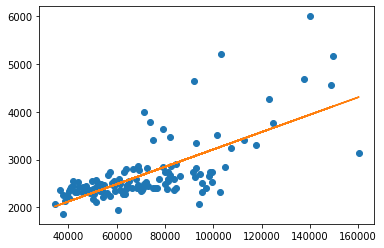

In [9]:
# making linear regression to observe how Median income influence on rental price
x = data2['Median_Income']
y = data2['rental price']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)

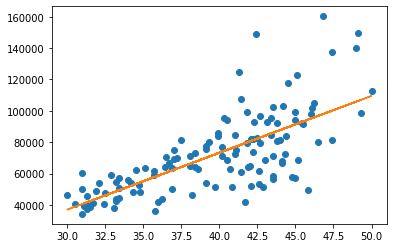

In [10]:
# making linear regression to observe age influence on income

y = data2['Median_Income']
x = data2['Median Age']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)

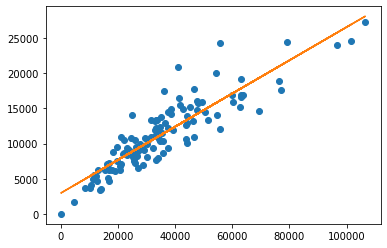

In [11]:
# same but Population and household
x = data2['Population']
y = data2['Household']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)

### First clustering

In [12]:
# set number of clusters
kclusters =3
# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(data2)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 2, 0, 0, 2, 0, 1, 0, 1], dtype=int32)

In [13]:
data2.insert(0, 'Cluster Labels', kmeans.labels_)

In [14]:
# create map
map_clusters = folium.Map(location=[34.0194, -118.411], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data['latitude'], data['longitude'], data['city'], data2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Checking clusters

In [15]:
# here you can check cluster 0

data2.loc[data2['Cluster Labels'] == 0, data2.columns[[1] + list(range(5, data2.shape[1]))]]

,Median_Income,Population,Household,median lengh of residence,Unemployed %,crimes
1,43585,14121,3605,10.0,9.51,128
3,79242,33255,13293,8.8,5.01,188
4,82254,16107,7116,7.1,3.39,188
6,37553,26908,6484,7.9,7.64,184
8,71402,8537,3707,7.5,4.70,106
...,...,...,...,...,...,...
117,74965,46256,13167,9.9,6.83,292
118,80020,34505,10668,10.1,5.56,292
119,70932,32385,9438,9.3,7.49,292
121,61424,30261,9974,9.1,3.92,193


In [16]:
# here you can check cluster 1

data2.loc[data2['Cluster Labels'] == 1, data2.columns[[1] + list(range(5, data2.shape[1]))]]

,Median_Income,Population,Household,median lengh of residence,Unemployed %,crimes
7,149732,23296,9414,11.2,4.16,106
9,103032,11496,5579,6.9,4.60,106
16,92942,16988,7206,7.8,5.11,62
20,124849,19741,9572,7.4,2.96,30
24,137672,19728,7550,9.6,4.53,37
25,148899,35032,13856,9.7,4.10,57
26,101532,36032,17438,7.4,3.38,171
27,107242,41490,16460,8.8,4.72,171
34,140179,12326,5362,10.0,6.52,797
35,92096,25043,14054,7.1,5.41,797


In [17]:
# here you can check cluster 2

data2.loc[data2['Cluster Labels'] == 2, data2.columns[[1] + list(range(5, data2.shape[1]))]]

,Median_Income,Population,Household,median lengh of residence,Unemployed %,crimes
0,40225,46455,10966,8.0,6.84,128
2,75209,55775,24339,7.3,5.31,188
5,39498,101734,24548,7.1,7.30,184
10,54014,51612,13364,9.6,9.18,1174
11,46008,55751,12061,8.9,10.00,1174
17,46076,47724,16022,8.0,6.99,326
21,40325,76237,18865,8.1,7.32,429
23,45897,69195,14651,8.6,7.43,426
28,47281,96619,24064,8.9,8.94,634
45,50326,63188,19206,8.6,6.28,218


In [18]:
#Let's see the avg for every column in every cluster
avgdata2= data2.groupby(['Cluster Labels'], as_index=False).mean()

In [19]:
avgdata2.head()

,Cluster Labels,Median_Income,rental price,persons counted 2019,Median Age,Population,Household,median lengh of residence,Unemployed %,crimes
0,0,64659.338028,2566.112676,172.408451,39.525352,27825.845070,9344.197183,8.743662,5.895634,420.281690
1,1,109560.142857,3368.464286,125.750000,44.682143,27288.035714,10519.000000,10.357143,4.247500,302.678571
2,2,50976.320000,2357.120000,243.400000,34.468000,63592.120000,17293.120000,8.660000,6.650400,675.440000


### we have 3 groups:
    0-> income, rental price, homeless, age, population, unemployed and crimes with a regular level.
    1-> The rich group, with less unemployed and less homeless.
    2-> comminity with economic problems, highest unemployment and homeless, and high number of crimes. We
    have to avoid this one.

Let's go to create a new Df to work on it

In [20]:
dataplot= avgdata2.set_index('Cluster Labels')

In [21]:
# Give me the log of every one, is more easy to see in a histogram.
dataplot['Median_Income']=np.log(dataplot['Median_Income'])
dataplot['Population']=np.log(dataplot['Population'])
dataplot['Household']=np.log(dataplot['Household'])
dataplot['rental price']=np.log(dataplot['rental price'])
dataplot['crimes']=np.log(dataplot['crimes'])
dataplot['persons counted 2019']=np.log(dataplot['persons counted 2019'])
dataplot['Median Age']=np.log(dataplot['Median Age'])

### Histogram
    We have to use a Histogram to see grafically the difference in the clusters

In [22]:
dataplot= dataplot.T

In [23]:
dataplot.to_csv('./Data/dataplot.csv')

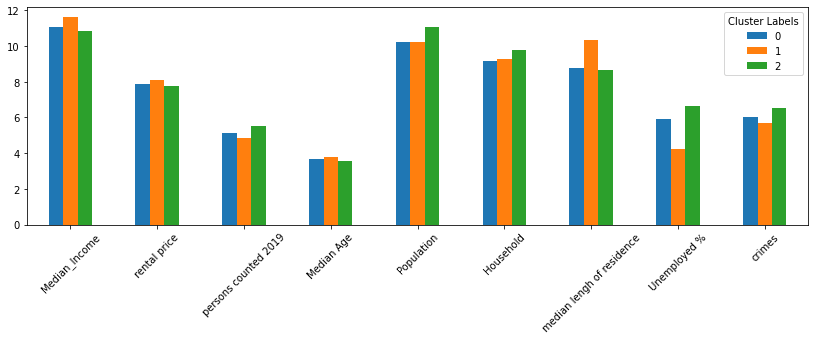

In [24]:
dataplot.plot.bar(figsize=(14, 4), rot=45)

### Let's go to create the third dataframe

In [25]:
data3=data

In [26]:
data3['Cluster Labels']= data2['Cluster Labels']

In [27]:
data3=data3.drop(['persons counted 2018','persons in perma housing','average house income'], axis=1)

In [28]:
data3.head()

,postalCode,Median_Income,rental price,city,persons counted 2019,latitude,longitude,Median Age,Population,Household,median lengh of residence,Unemployed %,crimes,Cluster Labels
0,90023,40225,2201,Commerce,295,34.0245,-118.1975,31.4,46455,10966,8.0,6.84,128,2
1,90040,43585,2317,Commerce,295,33.9909,-118.1532,33.2,14121,3605,10.0,9.51,128,0
2,90066,75209,3403,Culver City,236,34.0030,-118.4298,41.1,55775,24339,7.3,5.31,188,2
3,90230,79242,3630,Culver City,236,33.9949,-118.3991,41.8,33255,13293,8.8,5.01,188,0
4,90232,82254,3472,Culver City,236,34.0168,-118.3973,42.2,16107,7116,7.1,3.39,188,0


In [29]:
#Cluster 2 is too worst to work on it, lets get the others.
data3=data3.loc[data3['Cluster Labels'] != 2]

In [30]:
data3.shape

(99, 14)

In [31]:
# create map
map_clusters2 = folium.Map(location=[33.8194, -118.211], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data3['latitude'], data3['longitude'], data3['postalCode'], data3['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2

we can see than in the peremeter of LA are the better communities, so we have to find the epicenter of the better place looking richness/rental rate and homeless/crime rate. But first I'm going to remove the communities that are in the peripheral

In [32]:
data3=data3.loc[data3['postalCode'] != 90265]
data3=data3.loc[data3['postalCode'] != 91301]
data3=data3.loc[data3['postalCode'] != 91302]
data3=data3.loc[data3['postalCode'] != 91340]
data3=data3.loc[data3['postalCode'] != 93552]
data3=data3.loc[data3['postalCode'] != 90265]
data3=data3.loc[data3['postalCode'] != 90704]

In [33]:
data3.head()

,postalCode,Median_Income,rental price,city,persons counted 2019,latitude,longitude,Median Age,Population,Household,median lengh of residence,Unemployed %,crimes,Cluster Labels
1,90040,43585,2317,Commerce,295,33.9909,-118.1532,33.2,14121,3605,10.0,9.51,128,0
3,90230,79242,3630,Culver City,236,33.9949,-118.3991,41.8,33255,13293,8.8,5.01,188,0
4,90232,82254,3472,Culver City,236,34.0168,-118.3973,42.2,16107,7116,7.1,3.39,188,0
6,90270,37553,2263,Bell,504,33.9890,-118.1877,31.3,26908,6484,7.9,7.64,184,0
7,90210,149732,5170,Beverly Hills,19,34.0901,-118.4065,49.1,23296,9414,11.2,4.16,106,1


In [34]:
#With this we can see the communities with highest crimes
data3.loc[data3['crimes'] > 400]

,postalCode,Median_Income,rental price,city,persons counted 2019,latitude,longitude,Median Age,Population,Household,median lengh of residence,Unemployed %,crimes,Cluster Labels
12,90222,40719,2390,Compton,424,33.9099,-118.2357,30.5,34149,7953,8.6,8.54,1174,0
29,90301,42100,2451,Inglewood,461,33.9550,-118.3556,36.0,37367,12289,7.1,9.15,683,0
30,90302,43788,2522,Inglewood,461,33.9745,-118.3548,36.2,29584,10857,7.1,11.21,683,0
31,90303,44470,2421,Inglewood,461,33.9377,-118.3321,33.4,25873,7199,8.8,9.26,683,0
32,90304,41054,2430,Inglewood,461,33.9379,-118.3586,31.7,28773,6949,7.8,7.62,683,0
33,90305,68760,2867,Inglewood,461,33.9583,-118.3259,45.2,15473,6179,11.3,5.51,683,0
34,90402,140179,5995,Santa Monica,1002,34.0349,-118.5030,49.0,12326,5362,10.0,6.52,797,1
35,90403,92096,4635,Santa Monica,1002,34.0287,-118.4924,45.4,25043,14054,7.1,5.41,797,1
36,90404,73601,3775,Santa Monica,1002,34.0268,-118.4733,42.2,22260,10564,6.1,6.86,797,0
60,90746,81988,2684,Carson,326,33.8584,-118.2554,42.1,25484,7966,14.0,8.01,435,0


### As we can see, Long Beach has a high numbers of crimes, and Compton has 1174 that's not so much but the median income is too low... bye too.

In [35]:
data3=data3.loc[data3['crimes'] < 400]

###  let's go to simplify the data.

In [36]:
# Income - rental price. How much money they have after pay the rent.
data3['Money']= data3['Median_Income']-data3['rental price']

In [37]:
#homeless are unemployed, so lets go to remove the column
data3=data3.drop(['persons counted 2019', 'Median_Income','rental price'], axis=1)

In [38]:
data3['People by house']= data3['Population']/data3['Household']

In [39]:
data3=data3.drop(['Population', 'Household'], axis=1)

In [40]:
data.head()

,postalCode,Median_Income,rental price,city,persons counted 2018,persons counted 2019,persons in perma housing,latitude,longitude,Median Age,Population,Household,median lengh of residence,average house income,Unemployed %,crimes,Cluster Labels
0,90023,40225,2201,Commerce,490,295,17,34.0245,-118.1975,31.4,46455,10966,8.0,59679,6.84,128,2
1,90040,43585,2317,Commerce,490,295,17,33.9909,-118.1532,33.2,14121,3605,10.0,63661,9.51,128,0
2,90066,75209,3403,Culver City,117,236,69,34.0030,-118.4298,41.1,55775,24339,7.3,127240,5.31,188,2
3,90230,79242,3630,Culver City,117,236,69,33.9949,-118.3991,41.8,33255,13293,8.8,127747,5.01,188,0
4,90232,82254,3472,Culver City,117,236,69,34.0168,-118.3973,42.2,16107,7116,7.1,122950,3.39,188,0


In [41]:
# this is to get the avg
avgdata3= data3.groupby(['Cluster Labels'], as_index=False).mean()

In [42]:
avgdata3

,Cluster Labels,postalCode,latitude,longitude,Median Age,median lengh of residence,Unemployed %,crimes,Money,People by house
0,0,91023.921569,34.017263,-118.143802,40.45098,8.947059,5.60098,195.490196,63811.254902,2.990741
1,1,90798.800000,34.016145,-118.179090,44.12000,10.460000,4.21000,120.650000,104326.450000,2.633761


### please ignore the postal code, latitude, longitude AVG.
    We this 2 groups:
    0-> young people, less residence time, less money x person and more crimes.
    1-> older people, more residence time, more money x person and less crimes.
    Knowing this we have to focus on the group number 1, but we cannot forget the other group, because the money
    is x person, that's why I'm going to fuse them.

In [43]:
data3['zonemoney']= data3['People by house']*data3['Money']

In [44]:
data3=data3.drop(['People by house', 'Money'], axis=1)

In [45]:
avgdata3= data3.groupby(['Cluster Labels'], as_index=False).mean()

In [46]:
avgdata3

,Cluster Labels,postalCode,latitude,longitude,Median Age,median lengh of residence,Unemployed %,crimes,zonemoney
0,0,91023.921569,34.017263,-118.143802,40.45098,8.947059,5.60098,195.490196,188468.750022
1,1,90798.800000,34.016145,-118.179090,44.12000,10.460000,4.21000,120.650000,274198.605128


### the difference between zonemoney is important

We can cluster again, because now we have "new" variables

In [47]:
data3cluster= pd.DataFrame({'Median Age':data3['Median Age'],'median lengh of residence':data3['median lengh of residence'],'Unemployed %':data3['Unemployed %'], 'zonemoney':data3['zonemoney']})

In [48]:
# set number of clusters
kclusters =2
# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(data3cluster)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int32)

In [49]:
data3cluster.insert(0, 'Cluster Labels', kmeans.labels_)

In [50]:
data3['Cluster Labels']= data3cluster['Cluster Labels']

In [51]:
data3

,postalCode,city,latitude,longitude,Median Age,median lengh of residence,Unemployed %,crimes,Cluster Labels,zonemoney
1,90040,Commerce,33.9909,-118.1532,33.2,10.0,9.51,128,1,161649.217198
3,90230,Culver City,33.9949,-118.3991,41.8,8.8,5.01,188,1,189157.982397
4,90232,Culver City,34.0168,-118.3973,42.2,7.1,3.39,188,1,178322.326307
6,90270,Bell,33.9890,-118.1877,31.3,7.9,7.64,184,1,146450.234423
7,90210,Beverly Hills,34.0901,-118.4065,49.1,11.2,4.16,106,0,357734.900361
...,...,...,...,...,...,...,...,...,...,...
116,91780,Temple City,34.1016,-118.0537,44.1,10.0,4.09,64,1,200180.689043
117,91790,West Covina,34.0673,-117.9366,37.0,9.9,6.83,292,0,254898.066986
118,91791,West Covina,34.0653,-117.8978,39.3,10.1,5.56,292,0,250753.152418
119,91792,West Covina,34.0229,-117.8975,38.1,9.3,7.49,292,1,235142.962492


In [52]:
#this is the cluster, we have to focus on it
data3.loc[data3['Cluster Labels'] == 1, data3.columns[[1] + list(range(5, data3.shape[1]))]]

,city,median lengh of residence,Unemployed %,crimes,Cluster Labels,zonemoney
1,Commerce,10.0,9.51,128,1,161649.217198
3,Culver City,8.8,5.01,188,1,189157.982397
4,Culver City,7.1,3.39,188,1,178322.326307
6,Bell,7.9,7.64,184,1,146450.234423
8,Beverly Hills,7.5,4.70,106,1,155255.028864
9,Beverly Hills,6.9,4.60,106,1,201566.359563
14,Downey,7.8,5.24,367,1,194483.326325
15,Downey,8.3,5.27,367,1,206958.741374
16,El Segundo,7.8,5.11,62,1,211218.409659
18,Gardena,9.8,4.76,326,1,160385.032053


Now we have to find the centroid in a new coordinate's cluster, to see were is the better places.

In [53]:
# create map
map_clusters3 = folium.Map(location=[33.8194, -118.211], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data3['latitude'], data3['longitude'], data3['postalCode'], data3['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters3)
       
map_clusters3

In [54]:
data3.to_csv('./Data/data3.csv')

### We have a phew clouds of communities but I suggest the Glendale's cloud, between the zips 90201 and 90202 is sorrounded by 9 communities with high income and low crimes. So this is the best place.

We have the best community zone to place the restaurant, now we have to search in a page to lease our Restaurant's place. I used this page https://www.loopnet.com. And the nearest to our coordinates is https://www.loopnet.com/Listing/300-N-Central-Ave-Glendale-CA/9438501/.

 It has all the parameters than we want for a restaurant, and their median lengh of residence make the customers a good objetive, because they usually don't move to another city to leave, and their are surround 40 years old, with that information...